In [7]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [4]:
X_train = np.load('Data/X_train.npy', allow_pickle= True)
y_train = np.load('Data/Y_train.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1077 1077 462 462


# Decision Tree

Best parameters set found on development set:
 {'max_leaf_nodes': 45, 'min_samples_split': 25}

 Best Score 0.5688614242405354

 Grid scores on development set:
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.501 (+/-0.043) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.513 (+/-0.057) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.513 (+/-0.057) for {'m

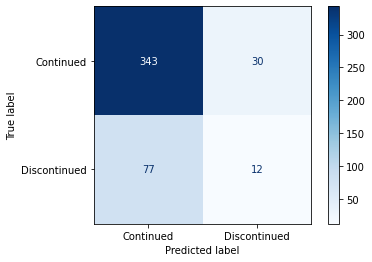

In [10]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [24]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_macro','accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])
print('mean f1 ', np.mean(scores['test_f1_macro']))
      
print('test_accuracy', scores['test_accuracy'])
print('mean acc1 ', np.mean(scores['test_accuracy']))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
test_f1_macro [0.49220348 0.59779708 0.52062768 0.5706233  0.52055572]
mean f1  0.540361452810819
test_accuracy [0.73051948 0.77597403 0.76298701 0.77597403 0.74918567]
mean acc1  0.7589280426413978


# With SMOTE Oversampling

In [25]:
X_train = np.load('Data/X_train_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 65, 'min_samples_split': 5}

 Best Score 0.7989430420845444

 Grid scores on development set:
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.691 (+/-0.062) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.691 (+/-0.062) for {'ma

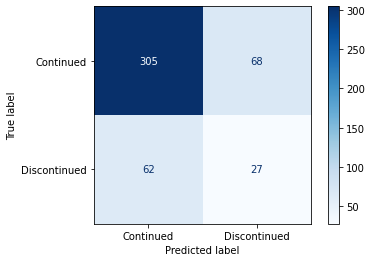

In [26]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [27]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_macro','accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])
print('mean f1 ', np.mean(scores['test_f1_macro']))
      
print('test_accuracy', scores['test_accuracy'])
print('mean acc1 ', np.mean(scores['test_accuracy']))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
test_f1_macro [0.64122594 0.82179582 0.8386556  0.83471074 0.73898822]
mean f1  0.7750752665723912
test_accuracy [0.675      0.825      0.84090909 0.83636364 0.75681818]
mean acc1  0.7868181818181819


# With Borderline-SMOTE Oversampling

In [28]:
X_train = np.load('Data/X_train_borderline_smote.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_borderline_smote.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1738 1738 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 65, 'min_samples_split': 5}

 Best Score 0.7808311300625684

 Grid scores on development set:
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.697 (+/-0.084) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.697 (+/-0.084) for {'ma

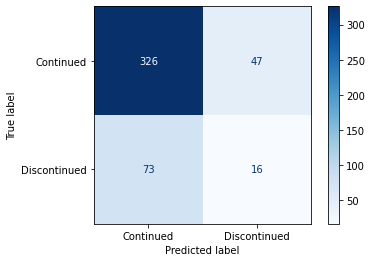

In [29]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [30]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_macro','accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])
print('mean f1 ', np.mean(scores['test_f1_macro']))
      
print('test_accuracy', scores['test_accuracy'])
print('mean acc1 ', np.mean(scores['test_accuracy']))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
test_f1_macro [0.58150424 0.82943592 0.82401006 0.83882784 0.73762671]
mean f1  0.7622809552961174
test_accuracy [0.64545455 0.83181818 0.825      0.84090909 0.75681818]
mean acc1  0.78


# With ADASYN Oversampling

In [32]:
X_train = np.load('Data/X_train_adasyn.npy', allow_pickle= True)
y_train = np.load('Data/Y_train_adasyn.npy', allow_pickle= True)

#Remains same regardless of oversampling
X_test = np.load('Data/X_test.npy', allow_pickle= True)
y_test = np.load('Data/Y_test.npy', allow_pickle= True)


print(len(X_train),len(y_train),len(X_test),len(y_test))

1686 1686 462 462


Best parameters set found on development set:
 {'max_leaf_nodes': 75, 'min_samples_split': 5}

 Best Score 0.7902008369079392

 Grid scores on development set:
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 5}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 10}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 15}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 20}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 25}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 30}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 35}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 40}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 45}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 50}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 55}
0.657 (+/-0.036) for {'max_leaf_nodes': 5, 'min_samples_split': 60}
0.657 (+/-0.036) for {'ma

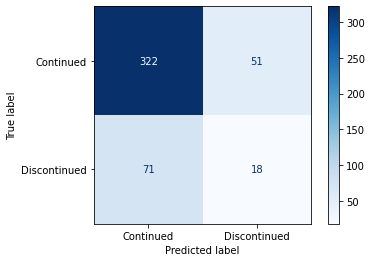

In [33]:
from sklearn.tree import DecisionTreeClassifier #import the DT classifier


tuned_parameters = [{'min_samples_split': [i for i in range(5,80,5)], 'max_leaf_nodes':  [k for k in range(5,80,5)]}]

clf = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)

#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Continued','Discontinued']

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test,display_labels=labels,cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [34]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
X = np.concatenate((X_train, X_test), axis=0)
Y = np.concatenate((y_train, y_test), axis=0)

scoring = ['f1_macro','accuracy']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])
print('mean f1 ', np.mean(scores['test_f1_macro']))
      
print('test_accuracy', scores['test_accuracy'])
print('mean acc1 ', np.mean(scores['test_accuracy']))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro']
test_f1_macro [0.5046358  0.80858688 0.84061573 0.83394946 0.73446867]
mean f1  0.7444513085400954
test_accuracy [0.61395349 0.81395349 0.84186047 0.83916084 0.75524476]
mean acc1  0.772834607253212
